In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv('startup_funding.csv')

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [35]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv('startup_funding.csv')

# Dropping Null Values
df['CityLocation'].dropna(inplace=True)


In [36]:
# Cleaning data
def check2(string):
    string = str(string)
    if string == 'Delhi':
        string = "New Delhi"
    string = string[0].upper() + string[1:]
    if '/' in string:
        n = string.split('/')
        string1 = n[0]
        string2 = n[1]
        if string1 == 'bangalore' or string1 == 'Bangalore' or string1 == 'Mumbai' or string1=='Gurgoan' or string1=='Noida' or string1=='New Delhi':
            string = string1
            string = string[0].upper() + string[1:] 
            return string
        if string2 == 'bangalore' or string2 == 'Bangalore' or string2 == 'Mumbai' or string2=='Gurgoan' or string2=='Noida' or string2=='New Delhi':
            string = string2
            string = string[0].upper() + string[1:] 

            return string
    else:
        return string

df['CityLocation'] = df['CityLocation'].apply(check2)
df = df[(df['CityLocation'] == "Mumbai") | (df['CityLocation'] == 'Bangalore') | (df['CityLocation'] == 'New Delhi') | (df['CityLocation'] == 'Gurgaon') | (df['CityLocation'] == 'Noida')]

In [57]:
# Extracting Unique cities and their count values
a = df['CityLocation'].value_counts()
cities = list(a.index)
count = list(a)
a

Bangalore    630
Mumbai       446
New Delhi    386
Gurgaon      240
Noida         78
Name: CityLocation, dtype: int64

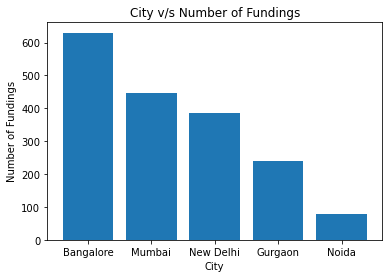

In [55]:
# Plotting
plt.bar(cities,count,width = 0.8)
plt.xlabel('City')
plt.ylabel('Number of Fundings')
plt.title('City v/s Number of Fundings')
plt.show()

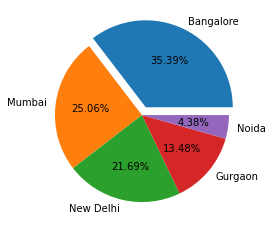

In [56]:
explode = [0.1,0,0,0,0]
plt.pie(count,explode = explode,labels=cities,autopct="%.2f%%")
plt.show()

## Question 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

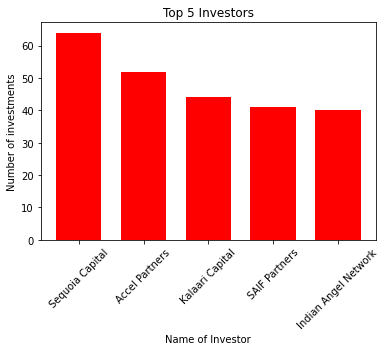

In [66]:
# Importing Libraries
import pandas as pd
import numpy as np
import csv

# Reading datasets
with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
                
# Creating unique dict for Investor names
    dic=dict()
    for i in investors:
        if i != '':
            if i in dic.keys():
                dic[i]+=1
            else:
                dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    
    names = np_x
    number = np_y
    
# Plotting
top_5_names = names[:5]
top_5_funds = number[:5]

plt.bar(top_5_names,top_5_funds,width = 0.7,color = 'red')
plt.xlabel('Name of Investor')
plt.ylabel('Number of investments')
plt.title('Top 5 Investors')
plt.xticks(rotation = 45)
plt.show()

In [69]:
print(top_5_names)
print(top_5_funds)

['Sequoia Capital' 'Accel Partners' 'Kalaari Capital' 'SAIF Partners'
 'Indian Angel Network']
[64 52 44 41 40]


## Question 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

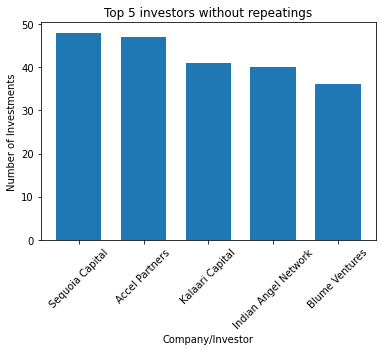

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

# Dropping NaN values
df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)

# Cleaning Data
df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

# Created dict
d = {}

# Traversing through all rows
for i in df.index:
    e = df["InvestorsName"][i].strip()
    
    # 'e' is value of each row
    if "," in e: # for multiple names investing in same business
        
        for j in e.strip().split(','):
            # j = each name in that list of names
            
            if j.strip() in d: # already a set exists, so just add the new investment to the set
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set() # create a set of that investor and add that startup name
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    
    
    else: # for single people
        a = e.strip()
        if a in d:
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
d1 = {}
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    d2 = sorted(d1,key = d1.get, reverse=True)[0:5]
names = []
amount=[]
    
for i in d2:
    names.append(i)
    amount.append(d1[i])
    
plt.bar(names,amount,width=0.7)
plt.xticks(rotation = 45)
plt.xlabel('Company/Investor')
plt.ylabel('Number of Investments')
plt.title('Top 5 investors without repeatings')
plt.show()

for i in range(len(names)):
    print(names[i],amount[i])

## Question 4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

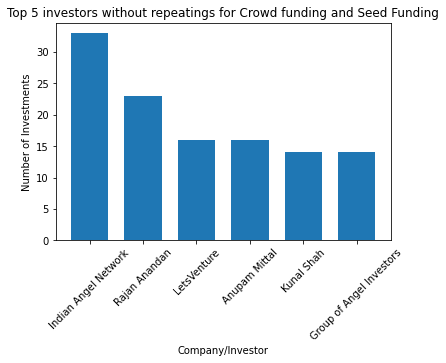

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14
Group of Angel Investors 14


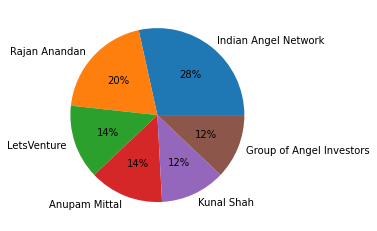

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

# Dropping NaN values
df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)

# Cleaning Data

def check(a):
    a = str(a)
    if a[0] == 'P':
        return 'Private Equity'
    if a[0] == 'S':
        return "Seed Funding"
    if a[0] == 'D':
        return  "Debt Funding"
    if a[0] == 'C':
        return "Crowd Funding"
        
df['InvestmentType'] =  df['InvestmentType'].apply(check)

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

# Applying filter
df = df[(df['InvestmentType'] =='Seed Funding') | (df['InvestmentType'] =='Crowd Funding') ] 
df = df[(df['InvestorsName'] != 'Undisclosed Investors') & (df['InvestorsName'] != 'Undisclosed investors')]



# Created dict
d = {}

# Traversing through all rows
for i in df.index:
    e = df["InvestorsName"][i].strip()
    
    # 'e' is value of each row
    if "," in e: # for multiple names investing in same business
        
        for j in e.strip().split(','):
            # j = each name in that list of names
            
            if j.strip() in d: # already a set exists, so just add the new investment to the set
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set() # create a set of that investor and add that startup name
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    
    
    else: # for single people
        a = e.strip()
        if a in d:
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
d1 = {}
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    d2 = sorted(d1,key = d1.get, reverse=True)[0:6]
names = []
amount = []
    
for i in d2:
    names.append(i)
    amount.append(d1[i])
    
plt.bar(names,amount,width=0.7)
plt.xticks(rotation = 45)
plt.xlabel('Company/Investor')
plt.ylabel('Number of Investments')
plt.title('Top 5 investors without repeatings for Crowd funding and Seed Funding')
plt.show()

for i in range(len(names)):
    print(names[i],amount[i])
    
plt.pie(amount,labels=names,autopct="%.0f%%")
plt.show()

## Question 5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

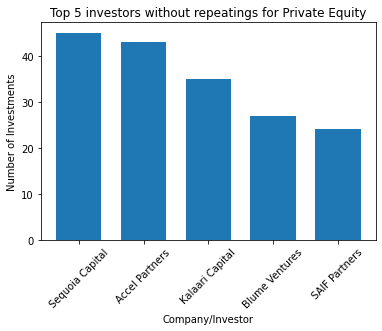

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


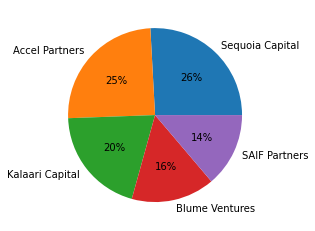

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()

# Dropping NaN values
df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)

# Cleaning Data

def check(a):
    a = str(a)
    if a[0] == 'P':
        return 'Private Equity'
    if a[0] == 'S':
        return "Seed Funding"
    if a[0] == 'D':
        return  "Debt Funding"
    if a[0] == 'C':
        return "Crowd Funding"
        
df['InvestmentType'] =  df['InvestmentType'].apply(check)

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

# Applying filter
df = df[(df['InvestmentType'] =='Private Equity')] 
df = df[(df['InvestorsName'] != 'Undisclosed Investors') & (df['InvestorsName'] != 'Undisclosed investors')]



# Created dict
d = {}

# Traversing through all rows
for i in df.index:
    e = df["InvestorsName"][i].strip()
    
    # 'e' is value of each row
    if "," in e: # for multiple names investing in same business
        
        for j in e.strip().split(','):
            # j = each name in that list of names
            
            if j.strip() in d: # already a set exists, so just add the new investment to the set
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set() # create a set of that investor and add that startup name
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    
    
    else: # for single people
        a = e.strip()
        if a in d:
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
d1 = {}
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    d2 = sorted(d1,key = d1.get, reverse=True)[0:5]
names = []
amount = []
    
for i in d2:
    names.append(i)
    amount.append(d1[i])
    
plt.bar(names,amount,width=0.7)
plt.xticks(rotation = 45)
plt.xlabel('Company/Investor')
plt.ylabel('Number of Investments')
plt.title('Top 5 investors without repeatings for Private Equity')
plt.show()

for i in range(len(names)):
    print(names[i],amount[i])
    
plt.pie(amount,labels=names,autopct="%.0f%%")
plt.show()